**Aprendizaje Automático** - 2024
# Clase 2: Introducción al Aprendizaje Automático


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Aprendizaje Inductivo

Para esta parte vamos a ver de manera bastante artesanal cómo explorar un problema de clasificación simple y computar algunas medidas de performance. En un futuro, vamos a utilizar librerías específicas que van a facilitar la parte de código, pero para empezar a entender mejor algunos de los conceptos vistos en la teórica, está bueno que en esta práctica nos ensuciemos un poco las manos.

## Parte 1: Creación de datos
Vamos primero a crear una función auxiliar:

```def dataset_sintetico_gausianas(medias, covs, n_puntos, etiquetas)```

Si llamamos a esta funcion con:
```
c1_mean = [0,3]
c2_mean = [3,0]
c3_mean = [2,3]
c4_mean = [1,2]
medias = [c1_mean,c2_mean,c3_mean,c4_mean]
cov = [[0.4,0],[0,1.2]]
covs = [cov,cov,cov,cov]
n_puntos = [100,100,100,100]
etiquetas = ['A','B','B','A']
```

Esto significa que tengo cuatro gaussianas bivariadas con distintas medias, y dos corresponden a la clase 'A', y las otras a 'B'. De cada gaussiana muestreo 100 puntos.
La función debe devolver un dataframe con los 400 puntos como filas, cada dimensión como columna (en este caso 2 porque la gausiana es bivariada), y una columna extra con nombre 'Clase' que indique si el punto pertenece a 'A' o a 'B'.

 La función *zip()* toma como argumento dos o más objetos iterables (idealmente cada uno de ellos con la misma cantidad de elementos) y retorna un nuevo iterable cuyos elementos son tuplas que contienen un elemento de cada uno de los iteradores originales.

In [2]:
def dataset_sintetico_gausianas(means, covs, points, labels, seed=1234):
  all_dfs = []
  np.random.seed(seed)

  for mean_i,cov_i,points_i,label_i in zip(means,covs,points,labels):
    features_i = np.random.multivariate_normal(mean=mean_i, cov=cov_i, size=points_i)
    dataset_i = pd.DataFrame(features_i)
    dataset_i['Clase'] = label_i
    all_dfs.append(dataset_i)

  return pd.concat(all_dfs)

El código es una función llamada "dataset_sintetico_gausianas" que genera un conjunto de datos sintéticos con distribución normal (gausiana). Toma como entrada cuatro parámetros: "means" y "covs" son listas de matrices que representan las medias y covarianzas de cada distribución normal, respectivamente. "points" es una lista de enteros que representa el número de puntos a generar para cada distribución normal. "labels" es una lista de etiquetas para cada distribución normal.

La función comienza inicializando una lista vacía llamada "all_dfs", que se usará para almacenar todos los DataFrames generados. Luego, establece una semilla de aleatoriedad utilizando np.random.seed para garantizar que los resultados sean reproducibles.

A continuación, la función itera sobre los cuatro parámetros proporcionados usando la función zip, que combina los elementos correspondientes de las listas "means", "covs", "points" y "labels". En cada iteración, la función genera un conjunto de características aleatorias utilizando la función multivariate_normal de la biblioteca NumPy, que toma la media y la matriz de covarianza como parámetros y genera una muestra aleatoria de una distribución normal multivariante. El número de puntos generados se especifica utilizando el parámetro "points_i".

Los datos generados se almacenan en un DataFrame de Pandas llamado "dataset_i", al que se le agrega una columna adicional llamada "Clase" que representa la etiqueta correspondiente. El DataFrame se agrega a la lista "all_dfs" para su posterior concatenación.

Finalmente, la función devuelve el resultado de la concatenación de todos los DataFrames generados, lo que da como resultado un conjunto de datos sintéticos completo con todas las distribuciones normales y etiquetas especificadas.

In [3]:
arr = np.random.multivariate_normal(mean=[0,1,2], cov=[[0.4,0,0],[0,1.2,0],[0,0,2.0]], size=100)

In [7]:
df= pd.DataFrame(arr)
df['Clase'] = 'A'

In [8]:
df

,0,1,2,Clase
0,0.681211,1.397444,0.545740,A
1,0.370552,0.676270,2.506996,A
2,-0.751170,1.803414,2.273063,A
3,-0.154274,-0.304290,3.539345,A
4,-0.679519,2.342631,0.721976,A
...,...,...,...,...
95,-0.049226,1.858749,1.443400,A
96,0.436340,-0.389553,3.934886,A
97,0.279098,2.995781,2.548959,A
98,-0.133878,1.208830,0.346214,A


Realicemos un scatter plot de los datos creados con los parámetros de ejemplo:

<Axes: xlabel='0', ylabel='1'>

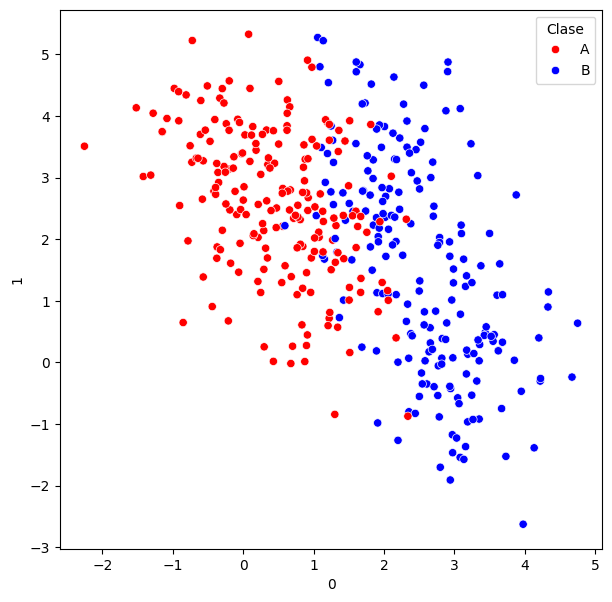

In [9]:
cov = [[0.4,0],[0,1.2]]
c1_mean = [0,3]
c2_mean = [3,0]
c3_mean = [2,3]
c4_mean = [1,2]

dataset = dataset_sintetico_gausianas([c1_mean,c2_mean,c3_mean,c4_mean], [cov,cov,cov,cov], [100,100,100,100], ['A','B','B','A'])

plt.figure(figsize=(7,7))
sns.scatterplot(x=0, y=1, hue='Clase', data=dataset, palette={'A':'red','B':'blue'})

## Parte 2: Definir un ajuste intuitivo


Vamos a tratar de encontrar una manera intuitiva de encontrar un punto de corte para separar los datos en dos clases.

Para ello vamos a aprender a hacer gráficos interactivos y utilizando sliders encontrar el mejor valor para separar los datos. Primero, importemos las bibliotecas que necesitaremos para crear nuestro gráfico interactivo.

In [10]:
from ipywidgets import interact

Ahora, crearemos una función que dibujará el gráfico que queremos hacer donde tendremos una recta controlada un slider para ajustar su intersección en el eje y.

In [11]:
def plot_line(b):
    cov = [[0.4,0],[0,1.2]]
    c1_mean = [0,3]
    c2_mean = [3,0]
    c3_mean = [2,3]
    c4_mean = [1,2]
    dataset = dataset_sintetico_gausianas([c1_mean,c2_mean,c3_mean,c4_mean], [cov,cov,cov,cov], [100,100,100,100], ['A','B','B','A'])

    fig, ax = plt.subplots()
    sns.scatterplot(x=0, y=1, hue='Clase', data=dataset, palette={'A':'red','B':'blue'})

    plt.axvline(x=b, c='k', lw=3)

    ax.set_xlim(-3, 5)
    ax.set_ylim(-4, 6)
    plt.show()

In [12]:
interact(plot_line, b=(-5.0, 5.0))

interactive(children=(FloatSlider(value=0.0, description='b', max=5.0, min=-5.0), Output()), _dom_classes=('wi…

<function __main__.plot_line(b)>

Repasando un poco la teoría, lo que estamos haciendo es explorar un **espacio de hipótesis** (H) conformado por todas las rectas verticales, para quedarnos con una única **hipótesis** (h) o modelo que consideremos que separa mejor los datos, y por lo tanto aproxima mejor la **función objetivo** (f) a partir de los **datos** que tenemos.

Estamos "entrenando a mano" un modelo de **aprendizaje supervisado**, puntualmente de **clasificación**, porque tenemos los datos **anotados** con la asignación de **clase** (color) de cada punto. Cada punto es por lo tanto una **instancia** o muestra, y el modelo construído va a permitirnos **predecir** una clase de acuerdo a la posición en el eje x de cada punto, siendo dicha posición el **atributo** que estamos usando para realizar la predicción. De esta manera, la **función objetivo** que nos permite separar los **datos** asignados a distintas **clases** define un **contorno de decisión** en el **espacio de atributos**.

##Parte 3: Determinar que tan buena fue la selección

Dado que vamos a usar un corte vertical, crearemos una partición en dos regiones (izquierda y derecha) y la idea sera evaluar esa partición.

In [13]:
# Corte por valor y partición
valor = 1
dataset_izq = dataset[dataset[0] <= valor]
dataset_der = dataset[dataset[0] > valor]

In [20]:
dataset_der["Clase"].value_counts()

,count
Clase,
B,199
A,53


In [23]:
cant_der = dataset_der["Clase"].value_counts()['A']/dataset_der["Clase"].count()
print("El lado derecho tiene un porcentaje de clase A de: ",cant_der*100," %")

El lado derecho tiene un porcentaje de clase A de:  21.03174603174603  %


In [14]:
dataset_izq["Clase"].value_counts()

,count
Clase,
A,147
B,1


In [25]:
cant_izq

np.float64(0.006756756756756757)

In [27]:
cant_izq = dataset_izq["Clase"].value_counts()['B']/dataset_izq["Clase"].count()
print("El lado izquierdo tiene un porcentaje de clase B de: ", cant_izq*100, "%")

El lado izquierdo tiene un porcentaje de clase B de:  0.6756756756756757 %


Hagamos un repaso:

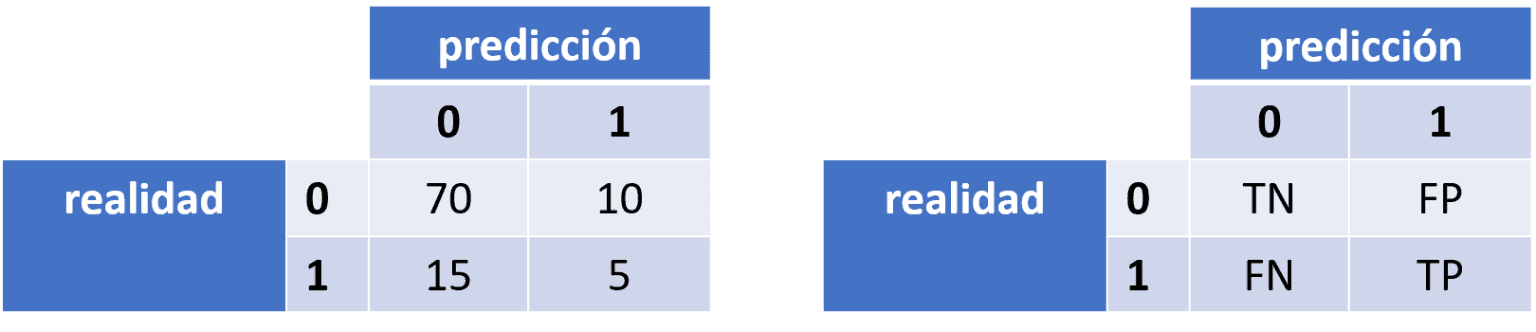

Precisión (Precision): mide la proporción de instancias positivas que fueron correctamente identificadas. Es decir, es la razón entre los verdaderos positivos y la suma de los verdaderos positivos y falsos positivos.

$Precision = \frac{TP}{TP + FP}$

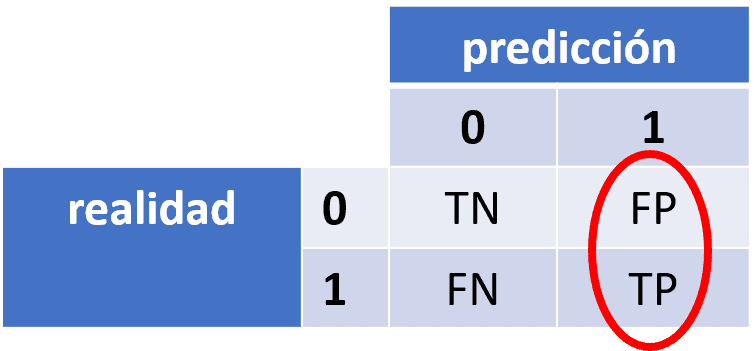

Recall (Sensibilidad o Tasa de Verdaderos Positivos): mide la proporción de instancias positivas que fueron correctamente identificadas en relación al total de instancias positivas. Es decir, es la razón entre los verdaderos positivos y la suma de los verdaderos positivos y falsos negativos.

$Recall = \frac{TP}{TP + FN}$

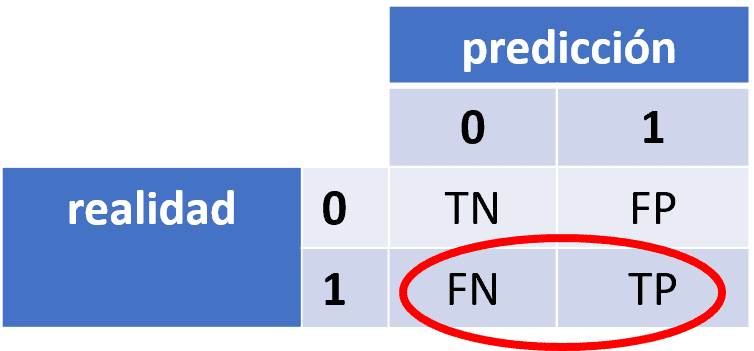

F1-Score: es una media armónica entre precision y recall. Es útil cuando se busca un equilibrio entre ambas métricas y se desea una medida que represente un buen desempeño global del modelo.

$F1\text{-}score = 2 * \frac{Precision * Recall}{Precision + Recall}$

Accuracy (Exactitud): mide la proporción de instancias totales que fueron correctamente clasificadas por el modelo. Es decir, es la razón entre los verdaderos positivos y verdaderos negativos y la suma de los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

$Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$

Donde:

    TP (True Positives): instancias positivas que fueron clasificadas correctamente.
    TN (True Negatives): instancias negativas que fueron clasificadas correctamente.
    FP (False Positives): instancias negativas que fueron clasificadas incorrectamente como positivas.
    FN (False Negatives): instancias positivas que fueron clasificadas incorrectamente como negativas.

### Ejercicio 1

Lo que quede en el dataset de la izquierda lo vamos a clasificar como A (podría ser como B también). De forma arbitraria vamos a tomar que la izquierda es positiva. Completar el código siguiente para calcular las métricas recién definidas.

In [29]:
dataset_izq["Clase"].value_counts()

,count
Clase,
A,147
B,1


In [30]:
dataset_der["Clase"].value_counts()

,count
Clase,
B,199
A,53


In [31]:
TP = dataset_izq[dataset_izq["Clase"]=="A"].shape[0]
TN = dataset_der[dataset_der["Clase"]=="B"].shape[0]
FP = dataset_izq[dataset_izq["Clase"]=="B"].shape[0]
FN = dataset_der[dataset_der["Clase"]=="A"].shape[0]

In [32]:
precision = TP / (TP + FP)
print("La precisión es ", precision)
recall = TP / (TP + FN)
print("La sensibilidad es ", recall)
F1 = 2 * precision * recall / (precision + recall)
print("El F1 es ",F1)
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("La exactitud es ", accuracy)

La precisión es  0.9932432432432432
La sensibilidad es  0.735
El F1 es  0.8448275862068965
La exactitud es  0.865


## Parte 4: Determinar el corte óptimo

Ya tenemos una función que divide nuestros datos en grupos, y calculamos las diferentes métricas.

Ahora necesitamos que calculen el valor óptimo de *corte* a partir de calcular las métricas para diferentes valores de la variable *corte*.

### Ejercicio 2

Elijan una métrica de las mencionadas anteriormente y completen según lo indicado las siguientes celdas de código.

In [35]:
dataset.loc[dataset["Clase"] == "A", "Clase"] = 0
dataset.loc[dataset["Clase"] == "B", "Clase"] = 1

In [38]:
def predecir_clase(data: pd.DataFrame,
                   col: int,
                   corte: float):
    # esta funcion recibe "data", un dataframe donde seleccionaremos col, la columna que utilizaremos para cortar
    # esta funcion devuelve un array con tantos valores como filas del dataframe, diciendo a que clase deberia pertenecer
    predicho = (data.iloc[:, col] >= corte).astype(int)
    return predicho

predicho=predecir_clase(dataset, 0, 1)
predicho

,0
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,1
97,0
98,0


In [39]:
predicho.value_counts()

,count
0,
1,252
0,148


In [45]:
def predecir_clase(data: pd.DataFrame, col: int, corte: float) -> pd.Series:
    return (data.iloc[:, col] >= corte).astype(int)

def calcular_matriz_confusion(clase_real: pd.Series, clase_predicha: pd.Series):
    TP = np.sum((clase_real == 1) & (clase_predicha == 1))
    TN = np.sum((clase_real == 0) & (clase_predicha == 0))
    FP = np.sum((clase_real == 0) & (clase_predicha == 1))
    FN = np.sum((clase_real == 1) & (clase_predicha == 0))
    return TP, TN, FP, FN

def calcular_metricas(data: pd.DataFrame, col: int, corte: float):
    clase_predicha = predecir_clase(data, col, corte)
    clase_real     = data["Clase"]

    TP, TN, FP, FN = calcular_matriz_confusion(clase_real, clase_predicha)

    # Para evitar división por cero, pongo un pequeño epsilon
    eps = 1e-10
    precision = TP / (TP + FP + eps)
    recall    = TP / (TP + FN + eps)
    F1        = 2 * precision * recall / (precision + recall + eps)
    accuracy  = (TP + TN) / (TP + TN + FP + FN + eps)

    return accuracy, precision, recall, F1

accuracy, precision, recall, F1 = calcular_metricas(dataset, 0, 1)

print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:   ", recall)
print("F1:       ", F1)

Accuracy:  0.8649999999997838
Precision: 0.7896825396822263
Recall:    0.9949999999995026
F1:        0.8805309734015997


### Ejercicio 3

Utilicen las funciones recién creadas y recorran un vector de cortes para encontrar el mejor de ellos según alguna métrica. ¿Cuál resulto ser el mejor corte para accuracy según la primera columna?

In [46]:
# Generamos los posibles cortes
l1 = np.arange(-3, 2, 0.1)

# Inicializamos las variables para almacenar las mejores métricas y sus respectivos cortes
mejor_accuracy = 0
mejor_corte_accuracy = None
mejor_precision = 0
mejor_corte_precision = None
mejor_recall = 0
mejor_corte_recall = None
mejor_F1 = 0
mejor_corte_F1 = None

# Iteramos sobre cada posible corte en l1
for corte in l1:
    accuracy, precision, recall, F1 = calcular_metricas(dataset, 0, corte)

    # Verificamos si esta precisión es la mejor hasta ahora para cada métrica
    if accuracy > mejor_accuracy:
        mejor_accuracy = accuracy
        mejor_corte_accuracy = corte

    if precision > mejor_precision:
        mejor_precision = precision
        mejor_corte_precision = corte

    if recall > mejor_recall:
        mejor_recall = recall
        mejor_corte_recall = corte

    if F1 > mejor_F1:
        mejor_F1 = F1
        mejor_corte_F1 = corte

# Imprimimos los mejores cortes y sus respectivas métricas
print("Mejor corte para la columna 0 (Accuracy):", mejor_corte_accuracy)
print("Mejor accuracy para la columna 0:", mejor_accuracy)
print("Mejor corte para la columna 0 (Precision):", mejor_corte_precision)
print("Mejor precision para la columna 0:", mejor_precision)
print("Mejor corte para la columna 0 (Recall):", mejor_corte_recall)
print("Mejor recall para la columna 0:", mejor_recall)
print("Mejor corte para la columna 0 (F1):", mejor_corte_F1)
print("Mejor F1 para la columna 0:", mejor_F1)


Mejor corte para la columna 0 (Accuracy): 1.600000000000004
Mejor accuracy para la columna 0: 0.8949999999997763
Mejor corte para la columna 0 (Precision): 1.900000000000004
Mejor precision para la columna 0: 0.9440993788814013
Mejor corte para la columna 0 (Recall): -3.0
Mejor recall para la columna 0: 0.9999999999995001
Mejor corte para la columna 0 (F1): 1.600000000000004
Mejor F1 para la columna 0: 0.8928571428067081
